In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem

In [6]:
import sys,os
import rdkit
import networkx as nx
import pandas as pd

In [7]:
from tqdm import tqdm_notebook

In [8]:
xyzmols={}
suppl = Chem.SDMolSupplier('../input/merged_mols.sdf',removeHs=False)
for mol in suppl:
    name=mol.GetProp("_Name").replace(".xyz","")
    xyzmols[name]=mol
len(xyzmols)

130774

In [124]:
graphmols={}
suppl = Chem.SDMolSupplier('../input/openbabel2mol.sdf',removeHs=False,sanitize=False) #if sanitize is true some mols is missing
for mol in suppl:
    name=mol.GetProp("_Name")
    graphmols[name]=mol
len(graphmols)

RDKit WARNING: [15:43:25] Warning: molecule is tagged as 3D, but all Z coords are zero


130775

In [10]:
molnames=sorted(list(set(list(xyzmols.keys())+list(graphmols.keys()))))
len(molnames)

130775

In [125]:
def get_smiles(mol):
    smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
    try:
        m = Chem.MolFromSmiles(smiles,sanitize=True)
        smiles = Chem.MolToSmiles(m, isomericSmiles=True)
    except:
        pass
    return smiles

In [149]:
checkstatus={}
for molname in tqdm_notebook(molnames):
    err_msg=""
    if molname not in xyzmols:
        err_msg += " mol not in merged. "
    if molname not in graphmols:
        err_msg += " mol not in openbabel. "        
    if not err_msg:
        mol1=xyzmols[molname]
        mol2=graphmols[molname]
        s1=get_smiles(mol1)
        s2=get_smiles(mol2)
        if s1==s2:
            pass
        else:
            err_msg = " not equal {} {}".format(s1,s2)
    checkstatus[molname]=err_msg

RDKit ERROR: [15:52:01] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:01] Explicit valence for atom # 2 

RDKit ERROR: [15:52:03] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:03] Explicit valence for atom # 1 

RDKit ERROR: [15:52:12] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:12] Explicit valence for atom # 1 

RDKit ERROR: [15:52:13] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:52:13] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:52:13] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:52:14] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:52:14] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:52:14] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:52:14] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:52:14] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:52:14] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:52:14] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:14] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:14] Explicit valence for atom # 2 

RDKit ERROR: [15:52:15] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:15] Explicit valence for atom # 2 

RDKit ERROR: [15:52:16] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:52:16] Explicit valence for atom # 2 

RDKit ERROR: [15:52:17] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:52:17] Explicit valence for atom # 1 

RDKit ERROR: [15:52:18] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:18] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:18] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:18] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:52:19] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:19] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:19] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:19] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:19] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:52:19] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:19] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:52:19] Explicit valence for atom # 2 

RDKit ERROR: [15:52:34] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:52:35] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:52:35] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:52:35] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:52:35] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:52:35] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [15:52:35] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:52:36] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [15:52:36] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:52:36] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [15:52:36] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [15:52:37] Explicit valence for atom # 7 

RDKit ERROR: [15:53:05] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:53:05] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:53:05] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:53:06] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:53:06] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:53:06] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:53:06] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:53:07] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:53:07] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:53:07] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:53:07] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:53:08] Explicit valence for atom # 8 

RDKit ERROR: [15:53:21] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:21] Explicit valence for atom # 2 

RDKit ERROR: [15:53:22] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:53:22] Explicit valence for atom # 3 

RDKit ERROR: [15:53:24] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:53:24] Explicit valence for atom # 5 

RDKit ERROR: [15:53:25] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 5 

RDKit ERROR: [15:53:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [15:53:25] Explicit valence for atom # 5 

In [150]:
df=pd.Series(checkstatus).to_frame().reset_index()
df.columns=['molname','msg']
df['has_error']=df['msg'].map(lambda u: u!="")

In [151]:
df.head()

molname msg  has_error
0  dsgdb9nsd_000001          False
1  dsgdb9nsd_000002          False
2  dsgdb9nsd_000003          False
3  dsgdb9nsd_000004          False
4  dsgdb9nsd_000005          False

In [152]:
df.has_error.sum(),df.shape

(6919, (130775, 3))

In [153]:
df.has_error.sum()/df.shape[0]

0.05290766583827184

In [154]:
dferror=df[df['has_error']]

In [155]:
dferror['msg'].map(lambda u: 'mol not in merged' in u).sum()

1

In [156]:
dferror['msg'].map(lambda u: 'mol not in openbabel' in u).sum()

0

In [157]:
dferror['msg'].map(lambda u: 'not equal' in u).sum()

6918

In [158]:
dferror=dferror[dferror['msg'].map(lambda u: 'not equal' in u)]

In [159]:
dferror.head()

molname                                                msg  \
161  dsgdb9nsd_000167   not equal [nH:0]1[cH:1][n:2][cH:3][n:4]1 [NH:...   
166  dsgdb9nsd_000172              not equal c1ncon1 [H]C1=N=C([H])O[N]1   
194  dsgdb9nsd_000204                       not equal CC1=NCOC1 Cc1cocn1   
200  dsgdb9nsd_000210              not equal Oc1c[nH]cn1 OC1=N[CH]N[CH]1   
201  dsgdb9nsd_000211         not equal Oc1cocn1 [H]OC1=N=C([H])O[C]1[H]   

     has_error  
161       True  
166       True  
194       True  
200       True  
201       True

In [160]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize=(600,400)
 
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

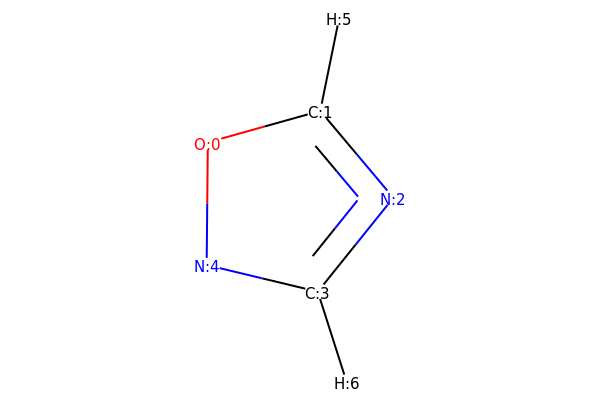

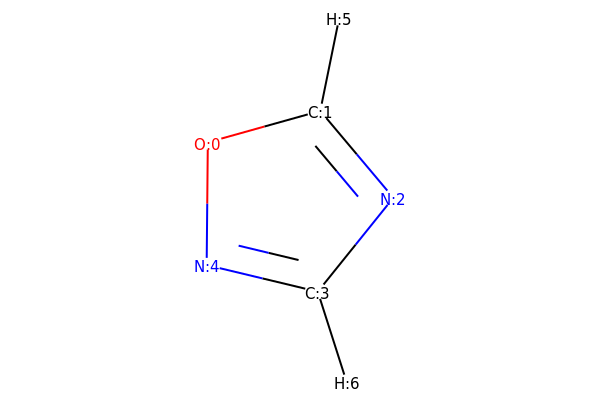

dsgdb9nsd_000172
     RDKit          3D

  7  7  0  0  0  0  0  0  0  0999 V2000
   -0.0224    1.2893    0.0092 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2612    1.6486   -0.0012 C   0  0  0  0  0  0  0  0  0  1  0  0
    2.0953    0.6569   -0.0144 N   0  0  0  0  0  0  0  0  0  2  0  0
    1.2327   -0.4152   -0.0119 C   0  0  0  0  0  0  0  0  0  3  0  0
   -0.0356   -0.1110    0.0018 N   0  0  0  0  0  2  0  0  0  4  0  0
    1.4767    2.7068    0.0024 H   0  0  0  0  0  0  0  0  0  5  0  0
    1.5614   -1.4440   -0.0206 H   0  0  0  0  0  0  0  0  0  6  0  0
  2  6  1  0
  2  1  1  0
  3  4  2  0
  3  2  2  0
  4  5  1  0
  5  1  1  0
  7  4  1  0
M  RAD  1   5   2
M  END

dsgdb9nsd_000172.xyz
     RDKit          3D

  7  7  0  0  0  0  0  0  0  0999 V2000
   -0.0224    1.2893    0.0092 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2612    1.6486   -0.0012 C   0  0  0  0  0  0  0  0  0  1  0  0
    2.0953    0.6569   -0.0144 N   0  0  0  0  0  0  0  0  0  2  0  0
    1.2327   -0.4

In [164]:
name='dsgdb9nsd_000172'
display(mol_with_atom_index(graphmols[name]))
display(mol_with_atom_index(xyzmols[name]))
print (Chem.MolToMolBlock(graphmols[name]))
print (Chem.MolToMolBlock(xyzmols[name]))

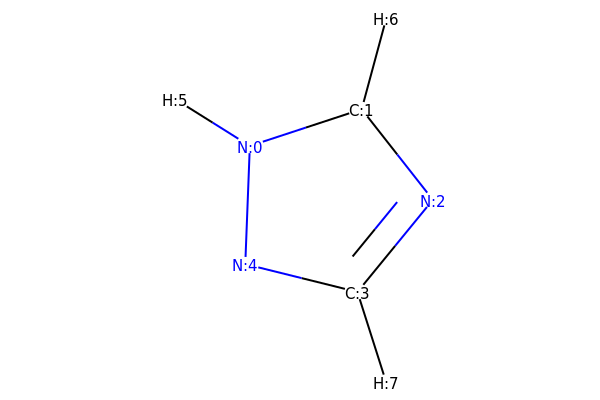

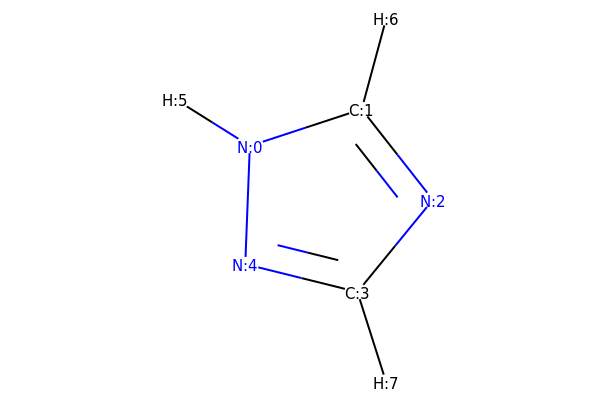

SANITIZE_NONE SANITIZE_NONE
dsgdb9nsd_000167
     RDKit          3D

  8  8  0  0  0  0  0  0  0  0999 V2000
    0.0069    1.3544    0.0098 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2877    1.7751   -0.0006 C   0  0  0  0  0  3  0  0  0  1  0  0
    2.1022    0.7379   -0.0144 N   0  0  0  0  0  0  0  0  0  2  0  0
    1.2387   -0.3172   -0.0116 C   0  0  0  0  0  0  0  0  0  3  0  0
   -0.0453    0.0015    0.0029 N   0  0  0  0  0  2  0  0  0  4  0  0
   -0.8460    1.8891    0.0212 H   0  0  0  0  0  0  0  0  0  5  0  0
    1.5694    2.8173    0.0023 H   0  0  0  0  0  0  0  0  0  6  0  0
    1.5661   -1.3458   -0.0204 H   0  0  0  0  0  0  0  0  0  7  0  0
  1  6  1  0
  2  7  1  0
  2  1  1  0
  3  4  2  0
  3  2  1  0
  4  5  1  0
  5  1  1  0
  8  4  1  0
M  RAD  2   2   2   5   2
M  END

dsgdb9nsd_000167.xyz
     RDKit          3D

  8  8  0  0  0  0  0  0  0  0999 V2000
    0.0069    1.3544    0.0098 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2877    1.7751   -0.0006 C   0  

In [166]:
name='dsgdb9nsd_000167'
display(mol_with_atom_index(graphmols[name]))
display(mol_with_atom_index(xyzmols[name]))
print (Chem.SanitizeMol(xyzmols[name]),Chem.SanitizeMol(graphmols[name]))
print (Chem.MolToMolBlock(graphmols[name]))
print (Chem.MolToMolBlock(xyzmols[name]))